In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('starbucks.csv')

In [3]:
df

,Unnamed: 0,item,calories,fat,carb,fiber,protein,type
0,1,8-Grain Roll,350,8.0,67,5,10,bakery
1,2,Apple Bran Muffin,350,9.0,64,7,6,bakery
2,3,Apple Fritter,420,20.0,59,0,5,bakery
3,4,Banana Nut Loaf,490,19.0,75,4,7,bakery
4,5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery
...,...,...,...,...,...,...,...,...
72,73,Tarragon Chicken Salad Sandwich,420,13.0,46,6,32,sandwich
73,74,Turkey & Swiss Sandwich,390,13.0,36,2,34,sandwich
74,75,Greek Yogurt Honey Parfait,300,12.0,44,0,8,parfait
75,76,Peach Raspberry Yogurt Parfait,300,4.0,57,3,10,parfait


In [4]:
df.isnull().sum()

Unnamed: 0    0
item          0
calories      0
fat           0
carb          0
fiber         0
protein       0
type          0
dtype: int64

In [5]:
df.drop(columns='Unnamed: 0', inplace=True)

In [6]:
df

,item,calories,fat,carb,fiber,protein,type
0,8-Grain Roll,350,8.0,67,5,10,bakery
1,Apple Bran Muffin,350,9.0,64,7,6,bakery
2,Apple Fritter,420,20.0,59,0,5,bakery
3,Banana Nut Loaf,490,19.0,75,4,7,bakery
4,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery
...,...,...,...,...,...,...,...
72,Tarragon Chicken Salad Sandwich,420,13.0,46,6,32,sandwich
73,Turkey & Swiss Sandwich,390,13.0,36,2,34,sandwich
74,Greek Yogurt Honey Parfait,300,12.0,44,0,8,parfait
75,Peach Raspberry Yogurt Parfait,300,4.0,57,3,10,parfait


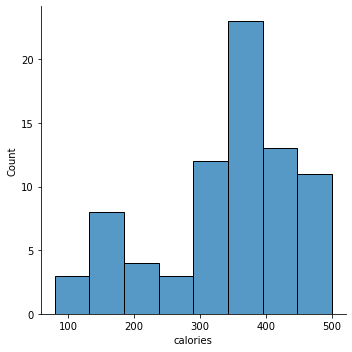

In [7]:
sns.displot(df['calories'])

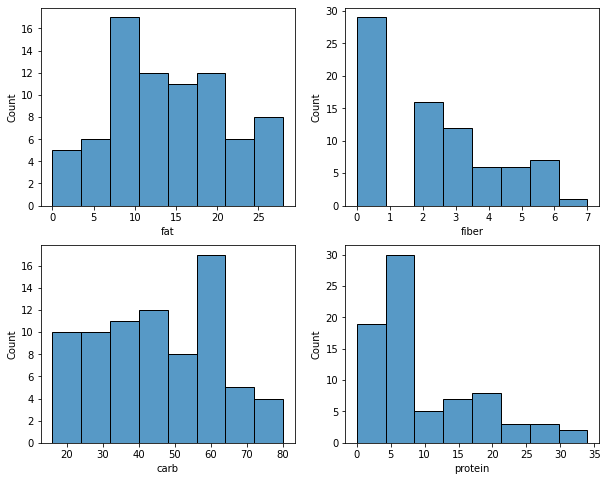

In [8]:
f, ax = plt.subplots(2,2,figsize=(10,8))
sns.histplot(df['fat'], ax=ax[0, 0])
sns.histplot(df['fiber'], ax=ax[0,1])
sns.histplot(df['carb'], ax=ax[1,0])
sns.histplot(df['protein'], ax=ax[1,1])
plt.show()

In [9]:
df["carb/calorie"] = df.carb / df.calories
df["fat/calorie"] = df.fat / df.calories
df["fiber/calorie"] = df.fiber / df.calories
df["protein/calorie"] = df.protein / df.calories

In [10]:
df

,item,calories,fat,carb,fiber,protein,type,carb/calorie,fat/calorie,fiber/calorie,protein/calorie
0,8-Grain Roll,350,8.0,67,5,10,bakery,0.191429,0.022857,0.014286,0.028571
1,Apple Bran Muffin,350,9.0,64,7,6,bakery,0.182857,0.025714,0.020000,0.017143
2,Apple Fritter,420,20.0,59,0,5,bakery,0.140476,0.047619,0.000000,0.011905
3,Banana Nut Loaf,490,19.0,75,4,7,bakery,0.153061,0.038776,0.008163,0.014286
4,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery,0.130769,0.046154,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
72,Tarragon Chicken Salad Sandwich,420,13.0,46,6,32,sandwich,0.109524,0.030952,0.014286,0.076190
73,Turkey & Swiss Sandwich,390,13.0,36,2,34,sandwich,0.092308,0.033333,0.005128,0.087179
74,Greek Yogurt Honey Parfait,300,12.0,44,0,8,parfait,0.146667,0.040000,0.000000,0.026667
75,Peach Raspberry Yogurt Parfait,300,4.0,57,3,10,parfait,0.190000,0.013333,0.010000,0.033333


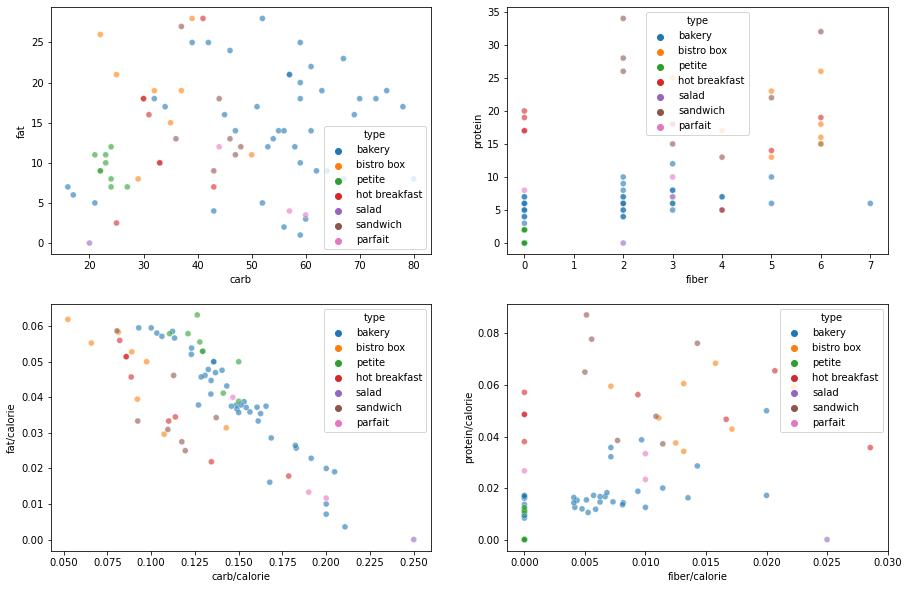

In [11]:
f, ax = plt.subplots(2,2, figsize=(15, 10))
sns.scatterplot(data=df, x='carb', y='fat', hue='type', alpha=0.6, ax=ax[0,0])
sns.scatterplot(data=df, x='fiber', y='protein', hue='type', alpha=0.6, ax=ax[0,1])
sns.scatterplot(data=df, x='carb/calorie', y='fat/calorie', hue='type', alpha=0.6, ax=ax[1,0])
sns.scatterplot(data=df, x='fiber/calorie', y='protein/calorie', hue='type', alpha=0.6, ax=ax[1,1])
plt.show()

Here we can appreciate that exists a negative correlation between the features fat per calorie and carb per calorie. The less fat per calorie the more carb per calorie. 
In the other hand, there is a little correlation between protein per calorie and fiber per calorie.

### Clustering

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [13]:
X = df[['calories', 'fat', 'carb', 'fiber','protein', 'carb/calorie', 'fat/calorie', 'protein/calorie', 'fiber/calorie']].values

In [14]:
scaler = StandardScaler()

In [15]:
X_scaled = scaler.fit_transform(X)

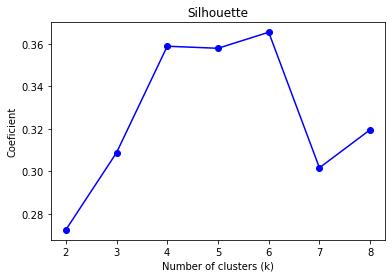

In [16]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = [2, 3, 4, 5, 6, 7, 8]
for k in k_values:
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=12, random_state=40)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Coeficient')
plt.title('Silhouette')
plt.show()


In [17]:
k=4

In [18]:
kmeans = KMeans(init = "k-means++", n_clusters=k, n_init = 12, random_state=40)

In [19]:
kmeans.fit(X_scaled)

KMeans(n_clusters=4, n_init=12, random_state=40)

In [20]:
labels = kmeans.labels_

In [21]:
df['cluster'] = labels

In [22]:
centers = kmeans.cluster_centers_

In [23]:
centers

array([[ 0.28864922,  0.26959314, -0.49887865,  0.73421885,  1.35798456,
        -0.94581011,  0.12291762,  1.35968166,  0.55497755],
       [-1.53931403, -0.64339558, -1.34402587, -1.05801761, -1.03734355,
        -0.15403203,  0.75782145, -0.96830336, -0.95697074],
       [ 0.76173618,  0.73232305,  0.68553035, -0.34339168, -0.37576479,
        -0.03780962,  0.35609699, -0.50864184, -0.43570617],
       [-0.49194428, -1.18682392,  0.58359588,  0.53004001, -0.30071969,
         1.52820655, -1.49357764, -0.11489332,  0.86572425]])

In [24]:
df[['item', 'type', 'cluster']].head()

,item,type,cluster
0,8-Grain Roll,bakery,3
1,Apple Bran Muffin,bakery,3
2,Apple Fritter,bakery,2
3,Banana Nut Loaf,bakery,2
4,Birthday Cake Mini Doughnut,bakery,1


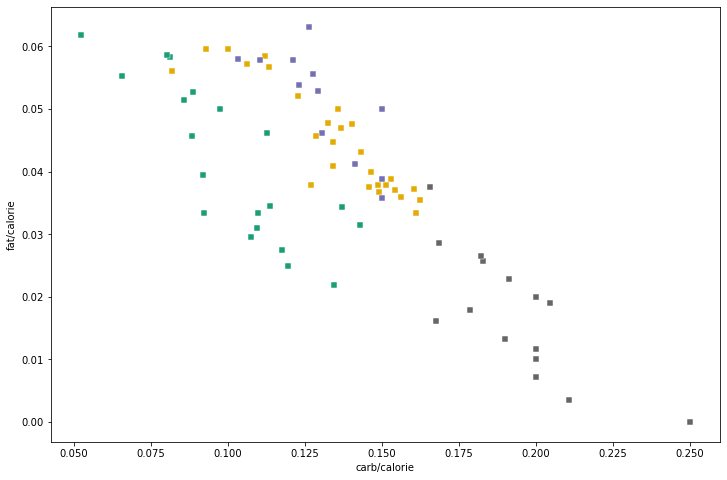

In [25]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['carb/calorie'], y=df['fat/calorie'], c=df['cluster'], cmap='Dark2', marker=',')
plt.show()

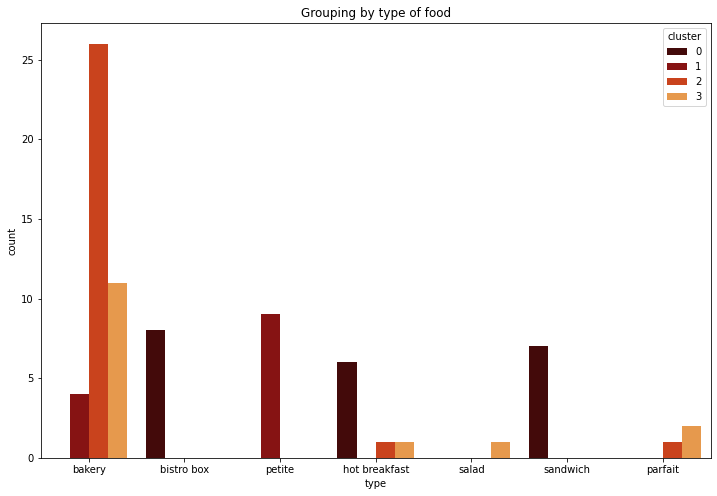

In [26]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='type', hue='cluster', palette='gist_heat')
plt.title('Grouping by type of food')
plt.show()

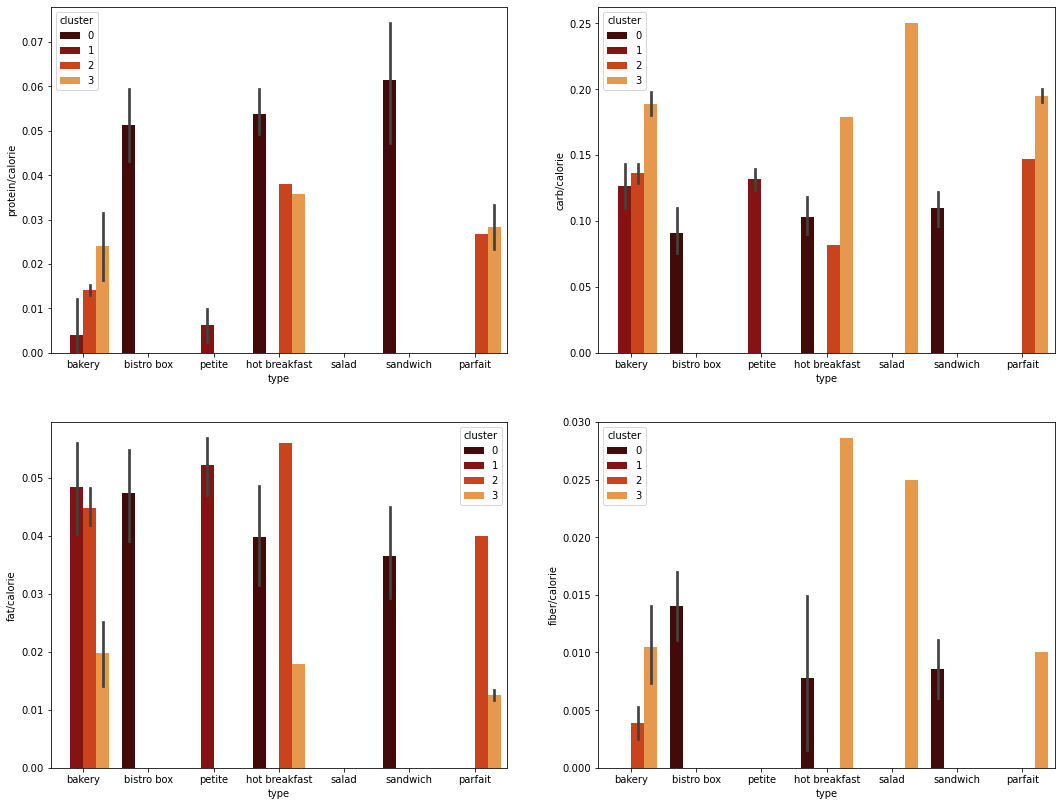

In [27]:
f, ax = plt.subplots(2,2, figsize=(18,14))
sns.barplot(data=df, x='type', y='protein/calorie', hue='cluster', palette='gist_heat', ax=ax[0,0])
sns.barplot(data=df, x='type', y='carb/calorie', hue='cluster', palette='gist_heat', ax=ax[0,1])
sns.barplot(data=df, x='type', y='fat/calorie', hue='cluster', palette='gist_heat', ax=ax[1,0])
sns.barplot(data=df, x='type', y='fiber/calorie', hue='cluster', palette='gist_heat', ax=ax[1,1])
plt.show()

- As it can be seen, based on the count plot, barplots and the starbucks data, cluster number 0 it's oriented for meals with supremacy in protein such as sandwiches, lunches and breakfasts. In the other hand, Cluster 1 belongs to petite type, such as thin doughs for bakery, this means that is food with a big quantity of fat. Cluster number 2 refers mostly to bakery, and a little bit in hot breakfast and parfait. So it's likelyhood to be food with a lot of fats like cluster 1. And finally, Cluster 3 correspond to the group of salads and bakery but unlike cluster 1 and 2, it does not have so many fats but rather many fibers and carbs.

In [28]:
corrmat = df.corr()

In [29]:
k = 10

In [30]:
cols = corrmat.nlargest(k, 'cluster')['cluster'].index

In [31]:
cols

Index(['cluster', 'carb/calorie', 'carb', 'fiber/calorie', 'calories', 'fiber',
       'fat', 'fat/calorie', 'protein/calorie', 'protein'],
      dtype='object')

In [32]:
cm = np.corrcoef(df[cols].values.T)

In [33]:
sns.set(font_scale=1.25)

<AxesSubplot:>

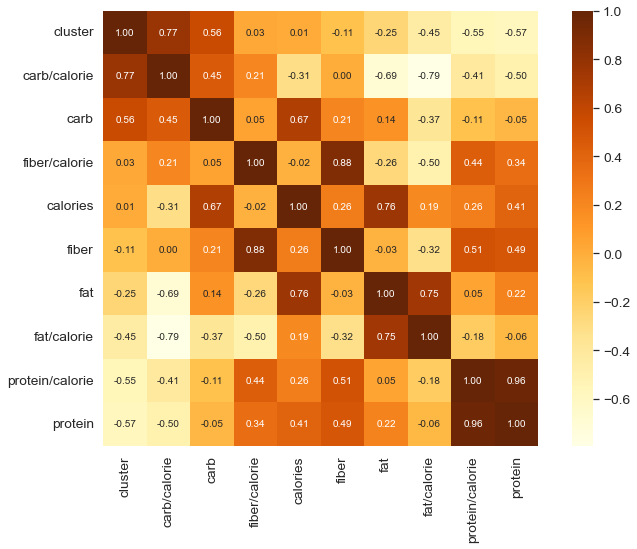

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', cmap = 'YlOrBr', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)

* It can be seen the negative correlation between fat/calorie and carb/calorie that we mentioned before and I found another little negative correlation between fat/calorie and fiber/calorie.